In [2]:
lat_mid, lon_mid = 30.3545 , 76.3702

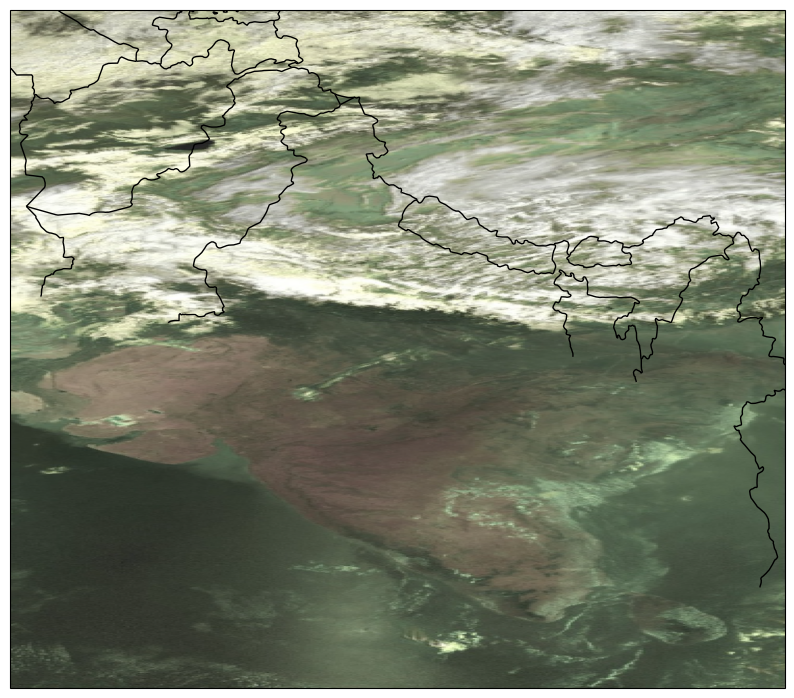

In [41]:
import cv2
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np

# Load the satellite image
image_path = 'elevation_90_deg.png'
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Define the sub-satellite point at max elevation
sub_satellite_lat = 35.3545
sub_satellite_lon = 55.3702

# Create a Cartopy projection centered at the sub-satellite point
projection = ccrs.PlateCarree()

# Plot the satellite image and overlay country boundaries
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': projection})

# Add the image as a background
ax.imshow(image_rgb, extent=[45, 100, 5, 40], transform=projection, origin='upper')

# Add country boundaries
ax.add_feature(cfeature.BORDERS, edgecolor='black')

# Set the extent to focus on the region of interest
ax.set_extent([60, 100, 5, 40], crs=projection)

plt.show()


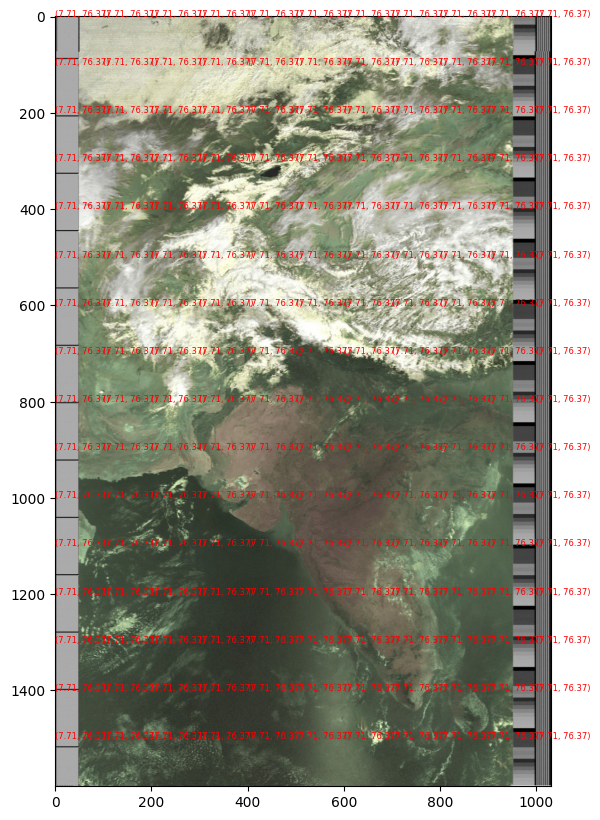

array([[[ 7.71171822, 76.37020076],
        [ 7.71171822, 76.37020075],
        [ 7.71171822, 76.37020075],
        ...,
        [ 7.71171962, 76.37019834],
        [ 7.71171962, 76.37019834],
        [ 7.71171962, 76.37019834]],

       [[ 7.71171822, 76.37020076],
        [ 7.71171822, 76.37020075],
        [ 7.71171822, 76.37020075],
        ...,
        [ 7.71171962, 76.37019834],
        [ 7.71171962, 76.37019834],
        [ 7.71171962, 76.37019834]],

       [[ 7.71171822, 76.37020076],
        [ 7.71171822, 76.37020075],
        [ 7.71171822, 76.37020075],
        ...,
        [ 7.71171962, 76.37019834],
        [ 7.71171962, 76.37019834],
        [ 7.71171962, 76.37019834]],

       ...,

       [[ 7.71171805, 76.37020167],
        [ 7.71171806, 76.37020166],
        [ 7.71171806, 76.37020166],
        ...,
        [ 7.71171946, 76.37019925],
        [ 7.71171946, 76.37019925],
        [ 7.71171946, 76.37019924]],

       [[ 7.71171805, 76.37020167],
        [ 7.71171806, 76.37

In [35]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Function to upload image
def upload_image(image_path):
    return Image.open(image_path)

# Function to convert pixel coordinates to lat/lon
def pixel_to_latlon(x, y, width, height, pixel_size, satellite_altitude, earth_radius, lat_mid, lon_mid):
    # Calculate the offset from the center of the image
    dx = (x - width / 2) * pixel_size
    dy = (y - height / 2) * pixel_size
    
    # Convert latitude and longitude to radians
    lat_mid_rad = np.deg2rad(lat_mid)
    lon_mid_rad = np.deg2rad(lon_mid)

    # Calculate the nadir point coordinates
    nadir_x = earth_radius * np.sin(lat_mid_rad) * np.cos(lon_mid_rad)
    nadir_y = earth_radius * np.sin(lat_mid_rad) * np.sin(lon_mid_rad)
    nadir_z = earth_radius * np.cos(lat_mid_rad) - satellite_altitude

    # Apply rotation matrices to find the coordinates in 3D space
    dx_rad = dx / earth_radius
    dy_rad = dy / earth_radius
    dz_rad = -satellite_altitude / earth_radius

    # Find the coordinates in the satellite frame
    x_sat = nadir_x + dx_rad
    y_sat = nadir_y + dy_rad
    z_sat = nadir_z + dz_rad

    # Convert satellite coordinates to latitude and longitude
    lat = np.arcsin(x_sat / np.sqrt(x_sat**2 + y_sat**2 + z_sat**2))
    lon = np.arctan2(y_sat, x_sat)

    return np.rad2deg(lat), np.rad2deg(lon)

# Main function to process the image and plot lat/lon grid
def process_image():
    # Upload the image (adjust the path as needed)
    image_path = 'Elevation_90_degrees.jpg'
    image = upload_image(image_path)
    
    # Get image dimensions
    width, height = image.size

    # Satellite parameters (adjust as needed)
    satellite_altitude = 850e3  # Altitude in meters
    earth_radius = 6371e3  # Earth radius in meters
    FOV = 55.4  # Field of View in degrees (adjust based on satellite)

    # Subsatellite point coordinates (adjust as needed)
    lat_mid = 30.3545
    lon_mid = 76.3702

    # Calculate swath width and pixel size
    swath_width = 2 * satellite_altitude * np.tan(np.deg2rad(FOV / 2))
    pixel_size = swath_width / width

    # Map the entire image to lat/lon
    latlon_map = np.zeros((height, width, 2))
    for y in range(height):
        for x in range(width):
            lat, lon = pixel_to_latlon(x, y, width, height, pixel_size, satellite_altitude, earth_radius, lat_mid, lon_mid)
            latlon_map[y, x] = [lat, lon]

    # Plot the image with lat/lon grid (sampled for clarity)
    plt.figure(figsize=(10, 10))
    plt.imshow(image)
    sample_rate = 100  # Sample rate for plotting lat/lon grid
    for y in range(0, height, sample_rate):
        for x in range(0, width, sample_rate):
            lat, lon = latlon_map[y, x]
            plt.text(x, y, f'({lat:.2f}, {lon:.2f})', color='red', fontsize=6)

    plt.show()
    return latlon_map

# Run the main function
process_image()


In [4]:
from PIL import Image
import numpy as np

# Load the image
image_path = "Elevation_90_degrees.jpg"
image = Image.open(image_path)
image_array = np.array(image)

# Get image dimensions
width, height = image.size
width, height
# Define ground station coordinates
ground_station_lat = 30.3545
ground_station_lon = 76.3702

# Assume a GSD (Ground Sample Distance) in meters
GSD = 20000  # 1 km/pixel
def pixel_to_latlon(pixel_x, pixel_y, ground_lat, ground_lon, GSD):
    # Calculate the offsets in meters
    offset_x_m = (pixel_x - width / 2) * GSD
    offset_y_m = (pixel_y - height / 2) * GSD

    # Convert offsets to degrees
    # Approximate conversions
    offset_lat = offset_y_m / 111320
    offset_lon = offset_x_m / (40075000 * np.cos(np.radians(ground_lat)) / 360)

    lat = ground_lat + offset_lat
    lon = ground_lon + offset_lon

    return lat, lon

# Example: Calculate the latitude and longitude of the center pixel
center_x, center_y = width // 2, height // 2
center_lat, center_lon = pixel_to_latlon(center_x, center_y, ground_station_lat, ground_station_lon, GSD)
center_lat, center_lon

(30.3545, 76.3702)

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Load the image
image_path = "Elevation_90_degrees.jpg"
image = Image.open(image_path)
width, height = image.size

# Define geographic bounds (approximate)
lat_bounds = (0, 45)
lon_bounds = (60, 100)

# Define grid intervals
lat_interval = 5  # degrees
lon_interval = 5  # degrees

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 15))

# Display the image
ax.imshow(image)

# Set the tick positions and labels
lat_ticks = np.arange(lat_bounds[0], lat_bounds[1] + lat_interval, lat_interval)
lon_ticks = np.arange(lon_bounds[0], lon_bounds[1] + lon_interval, lon_interval)

lat_tick_positions = [(1 - (lat - lat_bounds[0]) / (lat_bounds[1] - lat_bounds[0])) * height for lat in lat_ticks]
lon_tick_positions = [(lon - lon_bounds[0]) / (lon_bounds[1] - lon_bounds[0]) * width for lon in lon_ticks]

ax.set_yticks(lat_tick_positions)
ax.set_xticks(lon_tick_positions)
ax.set_yticklabels([f'{lat:.1f}°N' for lat in lat_ticks])
ax.set_xticklabels([f'{lon:.1f}°E' for lon in lon_ticks])

# Draw grid lines
ax.grid(True, which='both', color='black', linestyle='--', linewidth=0.5)

# Set axis labels
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Save the output image
output_grid_image_path = "georeferenced_image"
plt.savefig(output_grid_image_path, bbox_inches='tight')
plt.close()

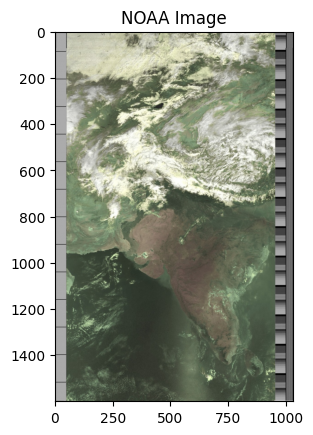

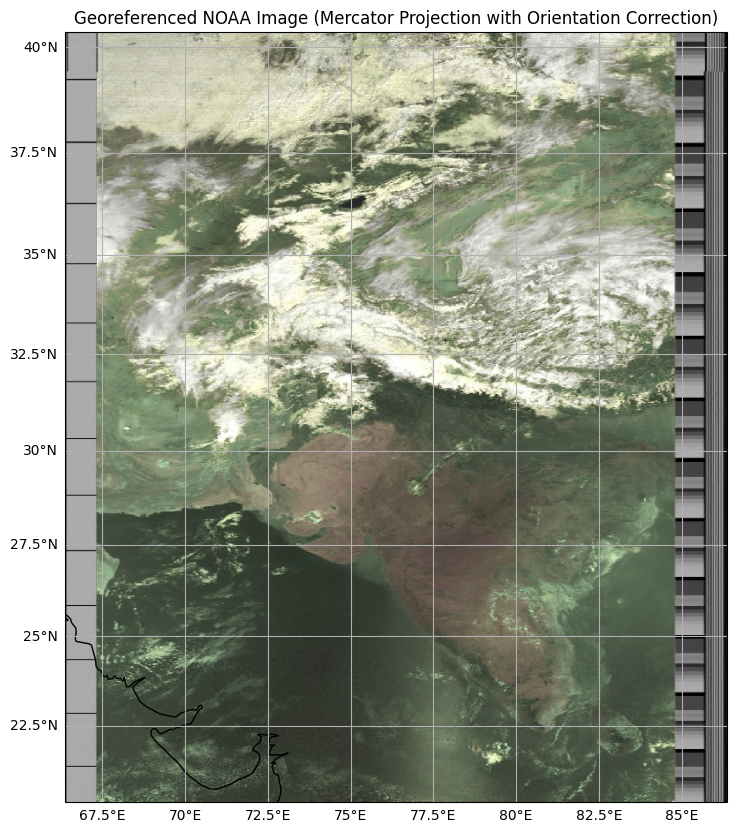

In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cartopy.crs as ccrs
from math import cos, sin, radians

# Upload the image to Google Colab


# Get the image file path
image_path = 'Elevation_90_degrees.jpg'

# Read the image
img = mpimg.imread(image_path)

# Display the image
plt.imshow(img)
plt.title('NOAA Image')
plt.show()

# Nadir point
lat_mid, lon_mid = 30.3545, 76.3702

# Number of pixels in the image
img_height, img_width, _ = img.shape

# Define the field of view (FOV) in degrees
fov_lat = 20  # Example value for the FOV in the latitude direction
fov_lon = 20  # Example value for the FOV in the longitude direction

# Define pitch, yaw, and roll in degrees
pitch = 0  # Replace with actual pitch value
yaw = 10    # Replace with actual yaw value
roll = 0   # Replace with actual roll value

# Convert angles to radians
pitch = radians(pitch)
yaw = radians(yaw)
roll = radians(roll)

# Calculate the bounding box
min_lat = lat_mid - (fov_lat / 2)
max_lat = lat_mid + (fov_lat / 2)
min_lon = lon_mid - (fov_lon / 2)
max_lon = lon_mid + (fov_lon / 2)

# Create arrays of the image pixel indices
x = np.linspace(min_lon, max_lon, img_width)
y = np.linspace(min_lat, max_lat, img_height)

# Create a meshgrid of the indices
X, Y = np.meshgrid(x, y)

# Rotation matrix components for pitch, yaw, and roll
R_pitch = np.array([[1, 0, 0],
                    [0, cos(pitch), -sin(pitch)],
                    [0, sin(pitch), cos(pitch)]])

R_yaw = np.array([[cos(yaw), 0, sin(yaw)],
                  [0, 1, 0],
                  [-sin(yaw), 0, cos(yaw)]])

R_roll = np.array([[cos(roll), -sin(roll), 0],
                   [sin(roll), cos(roll), 0],
                   [0, 0, 1]])

# Combined rotation matrix
R = R_roll @ R_yaw @ R_pitch

# Transform coordinates
coords = np.array([X.flatten(), Y.flatten(), np.zeros_like(X.flatten())])
coords_transformed = R @ coords
X_transformed = coords_transformed[0].reshape(X.shape)
Y_transformed = coords_transformed[1].reshape(Y.shape)

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': ccrs.Mercator()})

# Set the extent to the bounding box coordinates
ax.set_extent([min_lon, max_lon, min_lat, max_lat], crs=ccrs.PlateCarree())

# Plot the image
ax.imshow(img, extent=[min_lon, max_lon, min_lat, max_lat], origin='upper', transform=ccrs.PlateCarree())

# Add gridlines and coastlines for reference
gl = ax.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
ax.coastlines()

plt.title('Georeferenced NOAA Image (Mercator Projection with Orientation Correction)')
plt.show()

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Load the image
image_path = "Elevation_90_degrees.jpg"  # Update with your actual path
image = Image.open(image_path)
width, height = image.size

# Define geographic bounds for the Indian subcontinent
lat_bounds = (0, 45)  # degrees North
lon_bounds = (60, 100)  # degrees East

# Define grid intervals
lat_interval = 5  # degrees
lon_interval = 5  # degrees

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 15))

# Display the image
ax.imshow(image)

# Set the tick positions and labels
lat_ticks = np.arange(lat_bounds[0], lat_bounds[1] + lat_interval, lat_interval)
lon_ticks = np.arange(lon_bounds[0], lon_bounds[1] + lon_interval, lon_interval)

lat_tick_positions = [(1 - (lat - lat_bounds[0]) / (lat_bounds[1] - lat_bounds[0])) * height for lat in lat_ticks]
lon_tick_positions = [(lon - lon_bounds[0]) / (lon_bounds[1] - lon_bounds[0]) * width for lon in lon_ticks]

ax.set_yticks(lat_tick_positions)
ax.set_xticks(lon_tick_positions)
ax.set_yticklabels([f'{lat:.1f}°N' for lat in lat_ticks])
ax.set_xticklabels([f'{lon:.1f}°E' for lon in lon_ticks])

# Draw grid lines
ax.grid(True, which='both', color='red', linestyle='--', linewidth=0.5)

# Set axis labels
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Save the output image
output_grid_image_path = "georefrenced_image.jpg"  # Update with your actual path
plt.savefig(output_grid_image_path, bbox_inches='tight')
plt.close()

output_grid_image_path

'georefrenced_image.jpg'

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw

# Load the image
image_path = "Elevation_90_degrees.jpg"
image = Image.open(image_path)
width, height = image.size

# Subsatellite point in latitude and longitude
subsat_lat = 30.3545
subsat_lon = 76.3702

# Center pixel
center_x = width // 2
center_y = height // 2

# Define geographic bounds based on the subsatellite point and image coverage
lat_bounds = (subsat_lat - 22.5, subsat_lat + 22.5)  # Approximate bounds (45 degrees total latitude coverage)
lon_bounds = (subsat_lon - 20, subsat_lon + 20)     # Approximate bounds (40 degrees total longitude coverage)

# Define grid intervals
lat_interval = 5  # degrees
lon_interval = 5  # degrees

# Create a new image to draw the grid and labels
output_image = image.copy()
draw = ImageDraw.Draw(output_image)

# Function to map geographic coordinates to pixel coordinates
def geo_to_pixel(lat, lon, width, height, lat_bounds, lon_bounds):
    lat_min, lat_max = lat_bounds
    lon_min, lon_max = lon_bounds

    # Normalize the latitude and longitude
    lat_normalized = (lat - lat_min) / (lat_max - lat_min)
    lon_normalized = (lon - lon_min) / (lon_max - lon_min)

    # Convert to pixel coordinates
    x = int(lon_normalized * width)
    y = int((1 - lat_normalized) * height)  # Invert y-axis for image coordinates

    return x, y

# Calculate the positions for the grid lines and labels
lat_ticks = np.arange(lat_bounds[0], lat_bounds[1] + lat_interval, lat_interval)
lon_ticks = np.arange(lon_bounds[0], lon_bounds[1] + lon_interval, lon_interval)

lat_tick_positions = [geo_to_pixel(lat, subsat_lon, width, height, lat_bounds, lon_bounds)[1] for lat in lat_ticks]
lon_tick_positions = [geo_to_pixel(subsat_lat, lon, width, height, lat_bounds, lon_bounds)[0] for lon in lon_ticks]

# Draw grid lines
for y in lat_tick_positions:
    draw.line([(0, y), (width, y)], fill='red', width=1)

for x in lon_tick_positions:
    draw.line([(x, 0), (x, height)], fill='red', width=1)

# Draw labels
for lat, y in zip(lat_ticks, lat_tick_positions):
    draw.text((12, y), f'{lat:.1f}°N', fill='red')

for lon, x in zip(lon_ticks, lon_tick_positions):
    draw.text((x, 10), f'{lon:.1f}°E', fill='red')

# Mark the center pixel (subsatellite point)
draw.ellipse((center_x-5, center_y-5, center_x+5, center_y+5), fill='blue', outline='blue')

# Save the output image
output_grid_image_path = "geo_2.jpg"
output_image.save(output_grid_image_path)

output_grid_image_path

'geo_2.jpg'

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw

# Load the image
image_path = "image_of_india.jpg"
image = Image.open(image_path)
width, height = image.size

# Subsatellite point in latitude and longitude
subsat_lat = 30.3545
subsat_lon = 76.3702

# Center pixel
center_x = width // 2
center_y = height // 2

# Define approximate coverage of the image in degrees
lat_coverage = 60  # Total latitude coverage in degrees
lon_coverage = 60  # Total longitude coverage in degrees

# Define bounds based on the coverage
lat_bounds = (subsat_lat - lat_coverage / 2, subsat_lat + lat_coverage / 2)
lon_bounds = (subsat_lon - lon_coverage / 2, subsat_lon + lon_coverage / 2)

# Define grid intervals
lat_interval = 5  # degrees
lon_interval = 5  # degrees

# Create a new image to draw the grid and labels
output_image = image.copy()
draw = ImageDraw.Draw(output_image)

# Function to map geographic coordinates to pixel coordinates
def geo_to_pixel(lat, lon, width, height, lat_bounds, lon_bounds):
    lat_min, lat_max = lat_bounds
    lon_min, lon_max = lon_bounds

    # Normalize the latitude and longitude
    lat_normalized = (lat - lat_min) / (lat_max - lat_min)
    lon_normalized = (lon - lon_min) / (lon_max - lon_min)

    # Convert to pixel coordinates
    x = int(lon_normalized * width)
    y = int((1 - lat_normalized) * height)  # Invert y-axis for image coordinates

    return x, y

# Calculate the positions for the grid lines and labels
lat_ticks = np.arange(lat_bounds[0], lat_bounds[1] + lat_interval, lat_interval)
lon_ticks = np.arange(lon_bounds[0], lon_bounds[1] + lon_interval, lon_interval)

lat_tick_positions = [geo_to_pixel(lat, subsat_lon, width, height, lat_bounds, lon_bounds)[1] for lat in lat_ticks]
lon_tick_positions = [geo_to_pixel(subsat_lat, lon, width, height, lat_bounds, lon_bounds)[0] for lon in lon_ticks]

# Draw grid lines
for y in lat_tick_positions:
    draw.line([(0, y), (width, y)], fill='red', width=1)

for x in lon_tick_positions:
    draw.line([(x, 0), (x, height)], fill='red', width=1)

# Draw labels
for lat, y in zip(lat_ticks, lat_tick_positions):
    draw.text((10, y), f'{lat:.1f}°N', fill='red')

for lon, x in zip(lon_ticks, lon_tick_positions):
    draw.text((x, 10), f'{lon:.1f}°E', fill='red')

# Mark the center pixel (subsatellite point)
draw.ellipse((center_x-5, center_y-5, center_x+5, center_y+5), fill='blue', outline='blue')

# Save the output image
output_grid_image_path = "geo_3.jpg"
output_image.save(output_grid_image_path)

output_grid_image_path

'geo_3.jpg'